* 데이터

customer_master.csv : 쇼핑몰 사이트의 고객 정보

item_master.csv : 취급하는 상품 데이터(상품명, 가격)

transaction_1.csv, transaction_2.csv : 구매내역 데이터(언제, 어느 고객이 얼마나 샀는지)

transaction_detail_1.csv, transaction_detail_2.csv : 구매내역 상세 데이터

#### 테크닉 001 : 데이터를 읽어 들이자

In [1]:
# customer master 읽어오기
import pandas as pd

customer_master = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [2]:
# 다른 데이터 읽어오기

item_master = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [3]:
transaction_1 = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [4]:
transaction_detail_1 = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


데이터 가공 방향) 상세하게 나와 있는 쪽에 맞추어 데이터를 가공하는 것이 중요

매출 관련 데이터(transaction_detail)를 기준으로 생각

1. transaction_detail_1과 transaction_detail_2 / transaction_1과 transaction_2를 세로로 결합(유니언)

2. transaction_detail을 기준으로 transaction, customer_master, item_master를 가로로 결합(조인)

#### 테크닉 002 : 데이터를 결합(유니언)해 보자

In [5]:
# transaction 결합
transaction_2 = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index = True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [24]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [11]:
# transaction_detail 결합
transaction_detail_2 = pd.read_csv('/content/drive/My Drive/pyda100/pyda100-master/1장/transaction_detail_2.csv')
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2], ignore_index = True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


#### 테크닉 003 : 매출 데이터끼리 결합(조인)해 보자

매출 데이터 조인)

1. 부족한(추가하고 싶은) 데이터 칼럼이 무엇인지

2. 공통되는 데이터 칼럼은 무엇인지

이번 경우) transaction의 payment_date, customer_id(price : 한 번 구매할 때의 합계 금액 → transaction_detail의 quantity, item_master의 item_price로부터 계산된 것. price는 추가하지 않음)

공통 데이터 칼럼 : transaction_id

In [12]:
join_data = pd.merge(transaction_detail, transaction[['transaction_id', 'payment_date', 'customer_id']], on = 'transaction_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


- pd.merge로 조인
- 기준 : transaction_detail / 조인 키 : transaction_id / 조인 종류 : 레프트 조인

#### 테크닉 004 : 마스터데이터를 결합(조인)해 보자

- 추가할 데이터 : customer_master와 item_master에 포함된 데이터
- 공통 칼럼 : customer_id, item_id로 연결

In [13]:
join_data = pd.merge(join_data, customer_master, on = 'customer_id', how = 'left')
join_data = pd.merge(join_data, item_master, on = 'item_id', how = 'left')
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,PC-B,85000


- price가 사라졌기 때문에 다시 계산해야 함

#### 테크닉 005 : 필요한 데이터 칼럼을 만들자

- 매출 : quantity와 item_price의 곱을 계산해서 추가 가능

In [14]:
join_data['price'] = join_data['quantity'] * join_data['item_price']
join_data[['quantity', 'item_price', 'price']].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


- 데이터 결합 시 신중히 개수를 확인해야 함
- 되도록 검산이 가능한 데이터 칼럼을 찾고 계산할 것

#### 테크닉 006 : 데이터를 검산하자

In [23]:
# transaction의 price 총합 = 데이터 가공 후 join_data의 price 총합
print(join_data['price'].sum())
print(transaction['price'].sum())

971135000
971135000


In [17]:
# true/false를 이용, 두 값이 같은 지 확인
join_data['price'].sum() == transaction['price'].sum()

True

#### 테크닉 007 : 각종 통계량을 확인하자

1. 결손치의 개수 :  제거 혹은 보간
2. 전체를 파악할 수 있는 숫자감

In [18]:
# 결손치 파악
join_data.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [19]:
# 각종 통계량 파악
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


- count : 개수
- mean : 평균값
- std : 표준편차
- min : 최솟값
- 25% : 사분위수(1/4)
- 50% : 중앙값
- 75% : 사분위수(3/4)
- max : 최댓값

In [22]:
# 추가 확인 : 데이터의 기간
print(join_data['payment_date'].min())
print(join_data['payment_date'].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


#### 테크닉 008 : 월별로 데이터를 집계해 보자

- 전체적인 데이터를 파악했으므로 시계열 상황을 살펴볼 차례
- 범위가 넓을 경우, 범위를 좁혀서 분석하는 것도 하나의 방법
- 전체적인 매출의 증가/감소 여부를 파악하는 것이 첫 번째

* payment_date에서 연월 추출, 칼럼 생성 후 price 집계

In [25]:
# 데이터 형태 파악
join_data.dtypes

detail_id             int64
transaction_id       object
item_id              object
quantity              int64
payment_date         object
customer_id          object
customer_name        object
registration_date    object
email                object
gender               object
age                   int64
birth                object
pref                 object
item_name            object
item_price            int64
price                 int64
dtype: object

- payment_date : object형. 편의를 위해 datetime으로 변환 후 연월 생성

In [32]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"]) # datetime 변환
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m") # %Y%m : 연월 표기
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [33]:
# 월별 집계
join_data.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

- 5월 매출 소폭 감소, 6,7 월 회복
- 반년 중 가장 매출 높은 달 : 7월
- 한 달 대략 1억 6천의 매출 / 연간 20억 원 매출 예상
- 어떤 상품이 가장 잘 팔리는지 집계

#### 테크닉 009 : 월별, 상품별로 데이터를 집계해 보자

In [34]:
join_data.groupby(['payment_month', 'item_name']).sum()[['price', 'quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

- groupby로 출력하고 싶은 칼럼이 여러 개 : 리스트 형으로 지정
- pivot_table로 재집계

In [35]:
pd.pivot_table(join_data, index = 'item_name', columns = 'payment_month', values = ['price', 'quantity'], aggfunc = 'sum')

price                      ... quantity              
payment_month    201902    201903    201904  ...   201905 201906 201907
item_name                                    ...                       
PC-A           24150000  26000000  25900000  ...      497    520    505
PC-B           25245000  25500000  23460000  ...      298    282    332
PC-C           19800000  19080000  21960000  ...      171    182    162
PC-D           31140000  25740000  24300000  ...      144    160    145
PC-E           59850000  64050000  64890000  ...      280    302    341

[5 rows x 12 columns]

pivot_table : 행, 칼럼 지정 가능

- 행 : 상품명
- 칼럼 : 월

- 매출 합계 : PC-E가 가장 높음
- 수량 : PC-A가 가장 많음
- 5월에 매출이 감소한 것은 PC-E의 매출 감소가 큰 영향
- 간단한 그래프로 표현

#### 테크닉 010 : 상품별 매출 추이를 가시화해 보자

In [36]:
# pivot_table 이용, 데이터 집계
graph_data = pd.pivot_table(join_data, index = 'payment_month', columns = 'item_name', values = 'price', aggfunc = 'sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


- 그래프를 위해 가로축에 payment_month, 세로축에 graph_data의 해당 상품명 지정

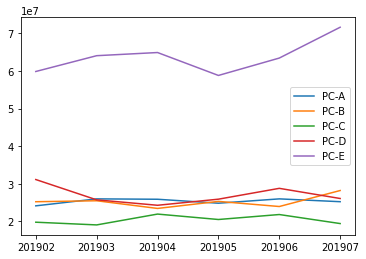

In [37]:
# matplotlib 이용, 그래프 작성
import matplotlib.pyplot as plt
%matplotlib inline # 노트북 상에 그래프를 표시하기 위한 코드

plt.plot(list(graph_data.index), graph_data['PC-A'], label = 'PC-A')
plt.plot(list(graph_data.index), graph_data['PC-B'], label = 'PC-B')
plt.plot(list(graph_data.index), graph_data['PC-C'], label = 'PC-C')
plt.plot(list(graph_data.index), graph_data['PC-D'], label = 'PC-D')
plt.plot(list(graph_data.index), graph_data['PC-E'], label = 'PC-E')

plt.legend()

- 가로축 : 월을 표시해야 하므로 graph_data.index를 리스트형으로 변환해서 지정
- 세로축 : 상품별 매출 → graph_data 칼럼 지정
- label : 범례 표시